#   <font color="#8333ff"> Analyse en Composantes Principales

### Tables des matières <a class="anchor" id="retour"></a> 

* [Présentation générale du projet](#Présentation)
* [Partie 1 :  Préparation des données](#Partie1)
    * [Section 1.1 Importation des données](#Section1.1)
    * [Section 1.2 Préparation des données](#Section1.2)
* [Partie 2 : Analyse en composantes principales (scikit-learn)](#Partie2)
    * [Section 2.1 Instanciation et lancement des calculs](#section2.1)
    * [Section 2.2 Valeurs propres et scree plot](#section2.2)
    * [Section 2.3 Détermination du nombre de fateur à retenir](#Section2.3)
    * [Section 2.4 Représentation des individus](#Section2.4)
    * [Section 2.5 Détermination du nombre de fateur à retenir](#Section2.5)    
* [Partie 3 : Traitement des individus et variables illustratifs](#Partie3)
    * [Section 3.1 Individus supplémentaires](#Section3.1)
    * [Section 3.2 Variables supplémentaires](#Section3.2)
    * [Section 3.3 Variable illustrative qualitative](#Section3.3)
    * [Section 3.4 Calcul des barycentres des modalitées de la variable qualitative](#Section3.4)

## Présentation <a class="anchor" id="Présentation"></a>
Ce notebook  est inspiré du cours:    
http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_ACP_Python.pdf  

>Les deux premières parties peuvent être lancées comme ca, il faudra juste s'assurer qu'il n'y a aucune données manquante.    
Pour la troisième partie il faudra adapter les données

## Partie 1 :  Préparation des données <a class="anchor" id="Partie1"></a>

### Section 1.1 Importation des données <a class="anchor" id="Section1.1"></a>

In [1]:
# importation des librairies nécessaires à l'analyse des données

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn import decomposition
from sklearn import preprocessing

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Permet d'avoir des cellules de taille 80
pd.set_option("max_colwidth", 80)

In [4]:
# Création d'un DF qui donne tous les DF et leurs significations
id =["coord","eigval","ratio_eigval","df_bs","df_ctr","cos2 ", "df_di", "df_corr",
     "df_cos2var", "df_ctrvar" ,"df_barycentre"]
meta_df = pd.DataFrame({'Commentaires': 
                        ['Coordonnées des individus sur les axes factorielles',
                         'Valeur propre = Variance composante principale',
                         'Somme des variances expliqués = Somme des valeurs propres',
                         "Methode des batons",
                         "Contribution des individus aux axes factorielles",
                         "Qualité de la représentation des individus dans le plan factoriel",
                         "Contribution des individus dans l'inertie totale",
                         "DF des corrélations entre les variables et les composantes  ",
                         "Qualité de la représentation des variables",
                         "Contribution de la variable  à la composante",
                         "Barycentre de chaque groupes"]}, index=id )
meta_df

,Commentaires
coord,Coordonnées des individus sur les axes factorielles
eigval,Valeur propre = Variance composante principale
ratio_eigval,Somme des variances expliqués = Somme des valeurs propres
df_bs,Methode des batons
df_ctr,Contribution des individus aux axes factorielles
cos2,Qualité de la représentation des individus dans le plan factoriel
df_di,Contribution des individus dans l'inertie totale
df_corr,DF des corrélations entre les variables et les composantes
df_cos2var,Qualité de la représentation des variables
df_ctrvar,Contribution de la variable à la composante


In [5]:
# Remet les valeurs d'origine
pd.reset_option("max_colwidth")

In [6]:
data=pd.read_csv("data_acp_cours_complet.csv",sep=";", index_col=0)

In [7]:
data

,CYL,PUISS,LONG,LARG,POIDS,V_MAX
Modele,,,,,,
Alfasud TI,1350,79,393,161,870,165
Audi 100,1588,85,468,177,1110,160
Simca 1300,1294,68,424,168,1050,152
Citroen GS Club,1222,59,412,161,930,151
Fiat 132,1585,98,439,164,1105,165
Lancia Beta,1297,82,429,169,1080,160
Peugeot 504,1796,79,449,169,1160,154
Renault 16 TL,1565,55,424,163,1010,140
Renault 30,2664,128,452,173,1320,180


In [8]:
print(pd.__version__)

1.1.3


In [9]:
# On nomme le DF X
X=data

# dimension
print(X.shape)

# nombre d'observation
n=X.shape[0]
p=X.shape[1]

(18, 6)


### Section 1.1 Préparation des données <a class="anchor" id="Section1.2"></a>

In [10]:
print(sklearn.__version__)

0.23.2


In [11]:
# instanciation
sc=StandardScaler()

# on travaille avec des données centrées reduites
Z=sc.fit_transform(X)
print(Z)

[[-0.77509889 -0.28335818 -1.88508077 -1.09734528 -1.56900676  0.56976043]
 [-0.12016326  0.01963869  1.60580955  2.0010414   0.23416142  0.14597168]
 [-0.92920139 -0.83885242 -0.44217944  0.25819889 -0.21663062 -0.53209032]
 [-1.12733318 -1.29334771 -1.00072189 -1.09734528 -1.11821472 -0.61684807]
 [-0.12841875  0.67613189  0.25599862 -0.51639778  0.19659542  0.56976043]
 [-0.9209459  -0.13185975 -0.20945342  0.45184806  0.0087654   0.14597168]
 [ 0.45221746 -0.28335818  0.72145067  0.45184806  0.60982146 -0.36257482]
 [-0.18345536 -1.49534562 -0.44217944 -0.71004695 -0.51715865 -1.54918332]
 [ 2.84080623  2.19111619  0.86108628  1.22644473  1.81193359  1.84112668]
 [-1.28143568 -1.49534562 -1.60580955 -1.87194195 -1.98223281 -1.54918332]
 [-0.16969621  1.23162613 -0.25599862 -0.90369611 -0.14149861  1.41733793]
 [ 0.45772112 -0.13185975  0.53526985  1.03279556  0.60982146 -0.02354382]
 [ 1.0080872   1.53462299  1.65235475  0.45184806  2.18759363  0.14597168]
 [ 0.99432805  0.67613189

In [12]:
# on vérifie que les données soient centrées
print(np.mean(Z,axis=0))

# et réduite
print(np.std(Z,axis=0,ddof=0))

[-2.22044605e-16 -1.41861831e-16  0.00000000e+00  1.86270752e-15
  5.73615229e-16  5.55111512e-16]
[1. 1. 1. 1. 1. 1.]


***
[<font color=blue> Retour à la Table Des Matières](#retour)
****

## Partie 2 : Analyse en composantes principales (scikit-learn) <a class="anchor" id="Partie2"></a>

### Section 2.1 Instanciation et lancement des calculs <a class="anchor" id="Section2.1"></a>

In [13]:
acp=PCA(svd_solver='full')

Le paramètre svd_solver='full' indique l'algorithme utilisé pour la décomposition en valeur singulière.    
nous choisissons la méthode exacte

In [14]:
acp

PCA(svd_solver='full')

In [15]:
# calculs
coord = acp.fit_transform(Z)

# nombre de composantes calculées
print(acp.n_components_)

6


### Section 2.2 Valeurs propres et scree plot <a class="anchor" id="Section2.2"></a>

La propriété .explained_variance_ semble bonne pour obtenir les variances(valeurs propres , λ) associées aux axes factoriels.

In [16]:
# variances expliquée
print(acp.explained_variance_)

[4.68090853 0.90641889 0.39501114 0.22650574 0.09826011 0.04583676]


Nous n'avons pas les bonnes valeurs, il faut ajouter une correction

In [17]:
# valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


Nous aurion pu obtenir les bonnes valeurs propre en passant par les valeurs singulières .singular_values_ issues    
de la factorisation de la matrice des données centrées reduites

In [18]:
# ou bien en passant par les valeurs singulières
print (acp.singular_values_**2/n)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


PCA fournit également les proportions de variances associées aux axes. il n'est pas nécessaire d'effectuer une correction dans ce cas

In [19]:
# proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.73680968 0.14267705 0.06217768 0.03565368 0.01546687 0.00721505]


La première composante accapare 73,68% de l'informationdisponible.      
Il y a un effet de taille. Nous disposons de 87.94% ac les 2 premiers facteurs

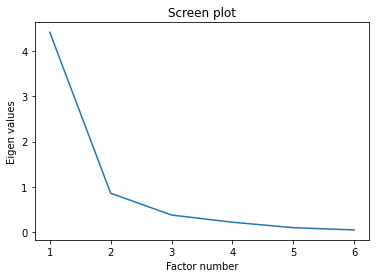

In [20]:
# screen plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Screen plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

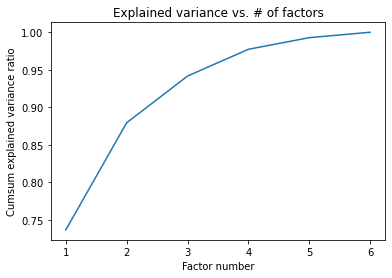

In [21]:
# Cumul de variance expliquée
plt.plot(np.arange(1,1+p), np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel('Factor number')
plt.show()

### Section 2.3 Détermination du nombre de fateur à retenir <a class="anchor" id="Section2.3"></a>

In [22]:
# seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [23]:
# test des bâtons brisés
df_bs= pd.DataFrame({'Val.Propre':eigval, 'Seuils':bs})
df_bs

,Val.Propre,Seuils
0,4.420858,2.450000
1,0.856062,1.450000
2,0.373066,0.950000
3,0.213922,0.616667
4,0.092801,0.366667
5,0.043290,0.166667


### Section 2.4 Représentation des individus  <a class="anchor" id="Section2.4"></a>

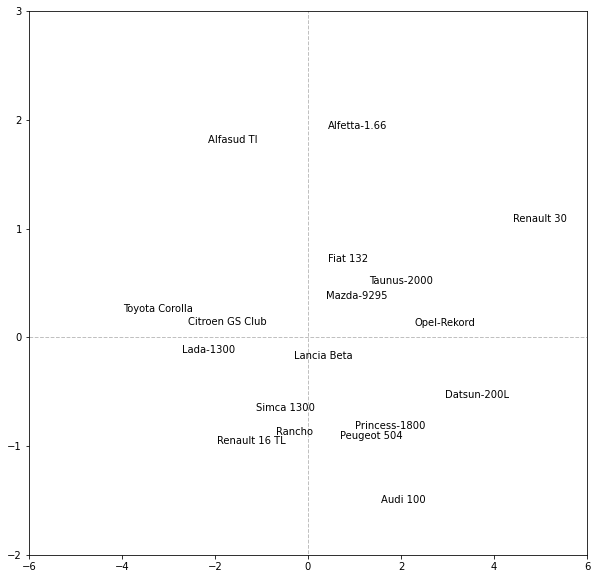

In [24]:
# Positionnement des individus dans le premier plan
fig,axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-6,6)
axes.set_ylim(-2,3)

# Placement des étiquettes et des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
    
# ajouter des axes
plt.plot([-6,6],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-6,6],color='silver', linestyle='--', linewidth=1)

# affichage
plt.show()

In [25]:
# Contribution des individus dans l'inertie totale
di=np.sum(Z**2,axis=1)
df_di = (pd.DataFrame({'d_i':di},index=X.index))
df_di

,d_i
Modele,
Alfasud TI,8.225176
Audi 100,6.673755
Simca 1300,2.159327
Citroen GS Club,6.780145
Fiat 132,1.169124
Lancia Beta,1.134950
Peugeot 504,1.512793
Renault 16 TL,5.636826
Renault 30,21.789657


In [26]:
# qualité de la représentation des individus  COS2
cos2=coord**2
for j in range(p):
    cos2[:,j]=cos2[:,j]/di
    
df_cos2=pd.DataFrame({'cos2_1':cos2[:,0],'cos2_2':cos2[:,1]},index = X.index)
df_cos2

,cos2_1,cos2_2
Modele,,
Alfasud TI,0.556218,0.387670
Audi 100,0.365334,0.349406
Simca 1300,0.580284,0.210694
Citroen GS Club,0.976992,0.001879
Fiat 132,0.156579,0.413826
Lancia Beta,0.081555,0.033900
Peugeot 504,0.309202,0.575488
Renault 16 TL,0.673539,0.170535
Renault 30,0.892431,0.051920


In [27]:
# Vérifie la théorie - somme des lignes des cos2=1
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### Contribution des iindividus aux axes (CTR)

In [28]:
# Contribution aux axes
ctr=coord**2
for j in range(p):
    ctr[:,j]=ctr[:,j]/(n*eigval[j])

df_ctr = pd.DataFrame({'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]},index=X.index)
df_ctr

,CTR_1,CTR_2
Modele,,
Alfasud TI,0.057493,0.206933
Audi 100,0.030640,0.151329
Simca 1300,0.015746,0.029525
Citroen GS Club,0.083244,0.000827
Fiat 132,0.002300,0.031398
Lancia Beta,0.001163,0.002497
Peugeot 504,0.005878,0.056499
Renault 16 TL,0.047711,0.062384
Renault 30,0.244369,0.073419


In [29]:
# On vérifie la théorie : ΣCTRik=1
print(np.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1.]


### Section 2.5 Représentation des variables  <a class="anchor" id="Section2.5"></a>

Nous avons besoin des vecteurs propres pour l'analyse des variables. ils sont fournis par le champ .components_

In [30]:
# le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.42493602  0.42179441  0.42145993  0.38692224  0.43051198  0.35894427]
 [ 0.12419108  0.41577389 -0.41181773 -0.446087   -0.24267581  0.6198626 ]
 [-0.35361252 -0.18492049  0.06763394  0.60486812 -0.48439601  0.48547226]
 [ 0.80778648 -0.35779199 -0.27975231  0.21156941 -0.30171136 -0.0735743 ]
 [ 0.15158003 -0.29373465  0.73056903 -0.47819008 -0.30455842  0.18865511]
 [-0.05889517 -0.63303302 -0.19029153 -0.10956624  0.5808122   0.45852167]]


Point important:   
les facteurs sont en ligne, les variables en colonne.    
Nous devons en tenir compte pour obtenir les corrélations en les multipliants par la racine carrée des valeurs propres

In [31]:
# racine carré des valeurs propres
sqrt_eigval = np.sqrt(eigval)

# corrélation des variables avec les axes
corvar = np.zeros((p,p ))

for k in range(p):
    corvar[: , k] = acp.components_[k, :]*sqrt_eigval[k]

# afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.89346354  0.1149061  -0.21598347  0.37361508  0.04617627 -0.01225391]
 [ 0.88685803  0.38468911 -0.11294784 -0.16548492 -0.08948124 -0.13171084]
 [ 0.88615477 -0.38102873  0.04131023 -0.12939024  0.22255537 -0.03959265]
 [ 0.81353638 -0.4127359   0.36944822  0.09785447 -0.14567244 -0.0227967 ]
 [ 0.90518746 -0.22453248 -0.29586489 -0.13954667 -0.09277852  0.12084561]
 [ 0.75471037  0.57351941  0.29652226 -0.03402937  0.05747056  0.09540146]]


In [32]:
# On affiche pour les 2 premiers axes
df_id = pd.DataFrame({'COR_1':corvar[:,0],'COR_2':corvar[:,1]},index = X.columns)
df_id

,COR_1,COR_2
CYL,0.893464,0.114906
PUISS,0.886858,0.384689
LONG,0.886155,-0.381029
LARG,0.813536,-0.412736
POIDS,0.905187,-0.224532
V_MAX,0.754710,0.573519


### Le cercle des corrélations

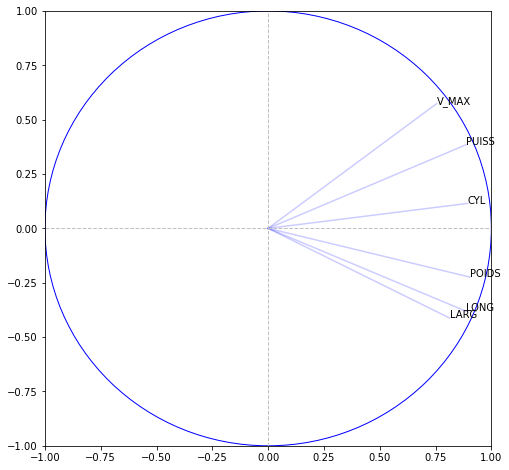

In [33]:
# cercle des correlations
fig,axes=plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# Affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
    plt.plot([0,corvar[j,0]],[0,corvar[j,1]],color='blue',alpha=0.2)
    
# ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

# Ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

# affichage
plt.show()

On perçoit clairement l'effet de taille sur le premier axe: les voitures puissantes et rapides sont aussi les plus lourdes et imposante, la relation globale entre les variables est en réalité determinée par la cylinfrée (CYL).

#### Qualité de représentation des variables (COS2)

In [34]:
# cosinus carré des variables
cos2var=corvar**2
df_cos2var = pd.DataFrame({'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]},index=X.columns)
df_cos2var

,COS2_1,COS2_2
CYL,0.798277,0.013203
PUISS,0.786517,0.147986
LONG,0.785270,0.145183
LARG,0.661841,0.170351
POIDS,0.819364,0.050415
V_MAX,0.569588,0.328925


#### Contribution des variables aux axes (CTR)       
#### CTRij = sqrt (r) jk / (λ)k

In [35]:
# contributions
ctrvar = cos2var

for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
    
# on n'affiche que les 2 premiers axes
df_cos2var = pd.DataFrame({'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]},index=X.columns)
df_cos2var

,CTR_1,CTR_2
CYL,0.180571,0.015423
PUISS,0.177911,0.172868
LONG,0.177628,0.169594
LARG,0.149709,0.198994
POIDS,0.185341,0.058892
V_MAX,0.128841,0.384230


 ## Partie 3 :  Traitement des individus et variables illustratifs <a class="anchor" id="Partie3"></a>

### Section 3.1 Individus supplémentaires <a class="anchor" id="Section3.1"></a>

In [36]:
ind_Sup=pd.read_csv("ACP_ind_sup_voiture.csv",sep=";",index_col=0)

In [37]:
ind_Sup

,CYL,PUISS,LONG,LARG,POIDS,V_MAX
Modele,,,,,,
Peugeot 604,2664,136,472,177,1410,180
Peugeot 304 S,1288,74,414,157,915,160


Nous devons centrée et reduire les variables des individus supplémentaires à l'aide des paramètres (moyenne et écart-type) des données actives ayant servi à construire le reère factoriel 

In [38]:
# centrage et reduction avec les paramètres des individus actifs
Zind_Sup=sc.transform(ind_Sup)
print(Zind_Sup)

[[ 2.84080623  2.59511201  1.79199036  2.0010414   2.48812166  1.84112668]
 [-0.94571238 -0.53585556 -0.90763148 -1.87194195 -1.23091273  0.14597168]]


In [39]:
# projection dans l'espace factoriel
coordSup=acp.transform(Zind_Sup)
print(coordSup)

[[ 5.56329226  0.33860928 -0.46428878  0.40214608 -0.38981076 -0.08102064]
 [-2.21224139  1.25777905 -0.09304388 -0.35370189  0.648528    0.12473042]]


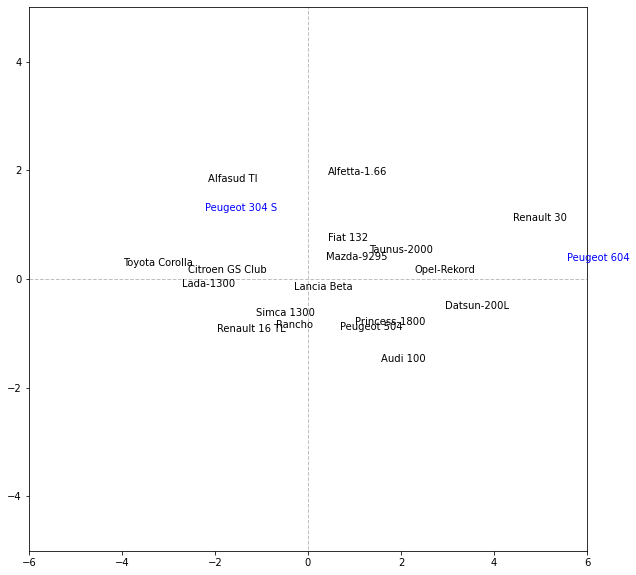

In [40]:
# positionnement des individus supplémentaires dans le premeier plan
fig,axes=plt.subplots(figsize=(10,10))
axes.set_xlim(-6,6)
axes.set_ylim(-5,5)

# étiquette des points actifs
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))

# etiquette des points supplémmentaires (illustratif) en bleu
for i in range(coordSup.shape[0]):
    plt.annotate(ind_Sup.index[i],(coordSup[i,0],coordSup[i,1]),color='blue')
    
# ajouter des axes
plt.plot([-6,6],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='--',linewidth=1)

# affichage
plt.show()

***
[<font color=blue> Retour à la Table Des Matières](#retour)
****

### Section 3.2 Variables supplémentaires <a class="anchor" id="Section3.2"></a>

In [41]:
# on reccupère les variables sup
Var_Sup=pd.read_csv("variables_sup_voiture_acp.csv",sep=";",index_col=0)
Var_Sup

,PRIX,R_POIDS_PUIS,FINITION
Modele,,,
Alfasud TI,30570,11.013,2_B
Audi 100,39990,13.059,3_TB
Simca 1300,29600,15.441,1_M
CitroenGS Club,28250,15.763,1_M
Fiat 132,34900,11.276,2_B
Lancia Beta,35480,13.171,3_TB
Peugeot 504,32300,14.684,2_B
Renault 16 TL,32000,18.364,2_B
Renault 30,47700,10.313,3_TB


In [42]:
# on reccupère les variables quantitatives dans un format np
vsQuanti= Var_Sup.iloc[:,:2].values

In [43]:
# Corrélation avec les axes fatoriels
corSupp = np.zeros((vsQuanti.shape[1],p))

for k in range(p):
    for j in range(vsQuanti.shape[1]):
        corSupp[j,k]=np.corrcoef(vsQuanti[:,j],coord[:,k])[0,1]
        
# affichage des corrélation avec les axes
print(corSupp)

[[ 0.77247524  0.08670844 -0.13389277 -0.22582891 -0.15944978 -0.10254878]
 [-0.58903133 -0.67252871 -0.15019774  0.21363857  0.10163937  0.29003495]]


On a une matrice 2xP:    
2 variables illustratives et p composantes principales générées

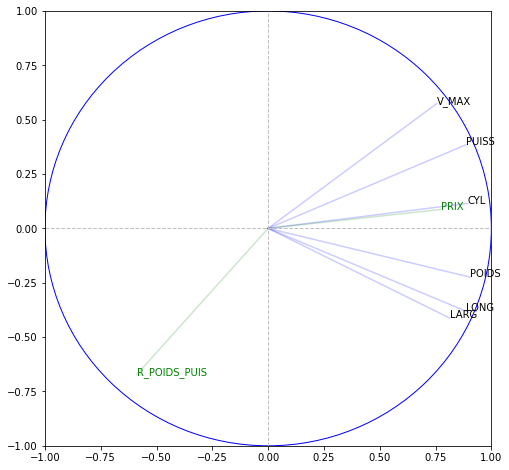

In [44]:
# cercle des corrélations avec var supp
fig,axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# variables actives
for j in range (p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
    plt.plot([0,corvar[j,0]],[0,corvar[j,1]],color='blue',alpha=0.2)
    
# variables illustratives
for j in range(vsQuanti.shape[1]):
    plt.annotate(Var_Sup.columns[j],(corSupp[j,0],corSupp[j,1]),color='g')
    plt.plot([0,corSupp[j,0]],[0,corSupp[j,1]],color='g',alpha=0.2)

# ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

# ajouter un cercle
cercle = plt.Circle((0,0),1,color='b',fill=False)
axes.add_artist(cercle)

# affichage
plt.show()

- la variable prix est globalement corrélées avec l'ensemble des variables, emportée par la première composante principale
- R_POIDS_PUIS (rapport poids-puissance) est quasi orthogonale au premier facteur. elle est à l'opposée de V_max

### Section 3.3  Variable illustrative qualitative <a class="anchor" id="Section3.3"></a>

In [45]:
# traitement de variable qualitative supplémentaire
vsQuali=Var_Sup.iloc[:,2]
vsQuali

Modele
Alfasud TI         2_B
Audi 100          3_TB
Simca 1300         1_M
CitroenGS Club     1_M
Fiat 132           2_B
Lancia Beta       3_TB
Peugeot 504        2_B
Renault 16 TL      2_B
Renault 30        3_TB
Toyota Corolla     1_M
Alfetta-1.66      3_TB
Princess-1800      2_B
Datsun-200L       3_TB
Taunus-2000        2_B
Rancho            3_TB
Mazda-9295         1_M
Opel-Rekord        2_B
Lada-1300          1_M
Name: FINITION, dtype: object

In [46]:
# on reccupère la liste des modalités
modalites=np.unique(vsQuali)
modalites

array(['1_M', '2_B', '3_TB'], dtype=object)

In [47]:
print(X.shape,vsQuali.shape,coord.shape)

(18, 6) (18,) (18, 6)


In [48]:
print(type(X),type(vsQuali),type(coord))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


In [49]:
print(modalites)

['1_M' '2_B' '3_TB']


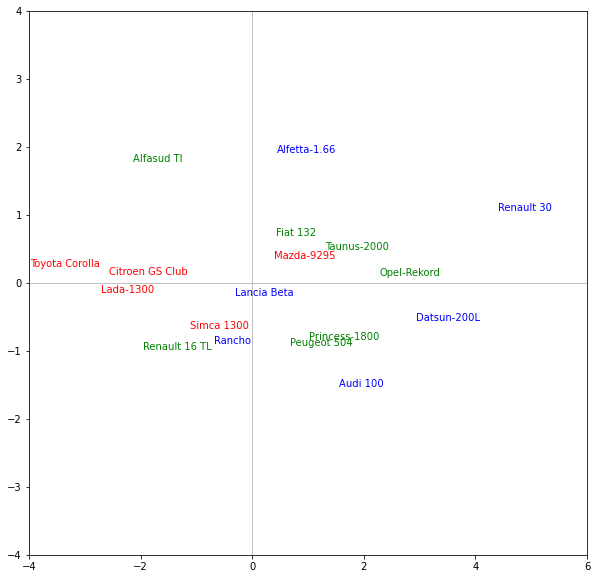

In [50]:
#liste des couleurs
couleurs = ['r','g','b']

#faire un graphique en coloriant les points
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-4,6)
axes.set_ylim(-4,4)


#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
#numéro des individus concernés
    numero = np.where(vsQuali == modalites[c])
#les passer en revue pour affichage
    for i in numero[0]:
        plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])
        
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

### Section 3.4  Calcul des barycentres des modalitées de la variable qualitative <a class="anchor" id="Section3.4"></a>

In [51]:
# structure intermédiaire
df_barycentre = pd.DataFrame({'Finition':vsQuali,'F1':coord[:,0],'F2':coord[:,1] })

# on calcul les moyennes conditionnelles
print(df_barycentre.pivot_table(index='Finition',values=['F1','F2'],aggfunc=pd.Series.mean))

                F1        F2
Finition                    
1_M      -2.000355 -0.022579
2_B       0.235313  0.045271
3_TB      1.392430 -0.034001


***
[<font color=blue> Retour à la Table Des Matières](#retour)
****